# Lecture 4:  Matrix rank, low-rank approximation, SVD

## Todays lecture
- Matrix rank
- Skeleton decomposition
- Low-rank approximation
- Singular Value Decomposition (SVD)
- Applications of SVD

## Matrix and linear spaces
A matrix can be considered as a sequence of vectors, its columns:
$$
   A = [a_1, \ldots, a_m], 
$$
where $a_m \in \mathbb{C}^{n\times 1}$.  
A matrix-by-vector product is equivalent to taking a linear combination of those columns  
$$
   y =  Ax, \quad \Longleftrightarrow y = a_1 x_1 + a_2 x_2 + \ldots +a_m x_m.
$$

This is a special case of **block matrix notation** (columns are also blocks) that we have already seen (blocking to fit cache memory, Strassen algorithm).

## Linear dependence

The key point is the concept of linear dependence between vectors.

Vectors $a_i$ are called **linearly dependent**, if there exist non-zero (simultaneously) coefficients $x_i$ such that  
$$\sum_i a_i x_i = 0,$$

or in the matrix form

$$
   Ax = 0, \quad \Vert x \Vert \ne 0.
$$

In this case, we say that the matrix $A$ has a non-trivial **nullspace** (or **kernel**) denoted by $N(A)$ (or $\text{ker}(A)$).

Vectors that are not linearly dependent are called **linearly independent**.

## Linear (vector) space
A **linear space** spanned by vectors $\{a_1, \ldots, a_m\}$ is defined as all possible vectors of the form 

$$
   \mathcal{L}(a_1, \ldots, a_m) = \left\{y: y = \sum_{i=1}^m a_i x_i, \, \forall x_i, \, i=1,\dots, n \right\}, 
$$

In the matrix form, the linear space is a set of all $y$ such that 

$$y = A x.$$

This set is also called the **range** (or **image**) of the matrix, denoted by $\text{range}(A)$ (or $\text{im}(A)$) respectively.


## Dimension of a linear space

The dimension of a linear space $\text{im}(A)$ denoted by $\text{dim}\, \text{im} (A)$  is the minimal number of vectors required to represent each vector from $\text{im} (A)$.

The dimension of $\text{im}(A)$ has a direct connection to the matrix rank.


## Matrix rank

Rank of a matrix $A$ is a maximal number of linearly independent *columns* in a matrix $A$, 
or the **dimension of its column space** $= \text{dim} \, \text{im}(A)$.  

You can also use linear combination of *rows* to define the rank, <br> i.e. formally there are two ranks: column rank and row rank of a matrix.

** Theorem**  
The dimension of the column space of the matrix is equal to the dimension of the row space of the matrix.

[Proof](https://ocw.mit.edu/courses/mathematics/18-701-algebra-i-fall-2010/study-materials/MIT18_701F10_rrk_crk.pdf)

In the matrix form this fact can be written as $\mathrm{dim}\ \mathrm{im} (A) = \mathrm{dim}\ \mathrm{im} (A^\top)$.

Thus, there is a single rank!

## Full-rank matrix

A matrix $A \in \mathbb{R}^{m \times n}$ is called of **full-rank**, if $\mathrm{rank}(A) = \min(m, n)$.

Suppose, we have a linear space, spanned by $n$ vectors. 
Let these vector be random with elements from standard normal distribution $\mathcal{N}(0, 1)$.

**Q**: What is the probability of the fact that this subspace has dimension $m < n$?

**A**: Random matrix has full rank with probability 1.

## Dimensionality reduction

A lot of data from real-world applications are high dimensional, for instance images (e.g. $512\times 512$ pixels), texts, graphs. <br>
However, working with high-dimensional data is not an easy task. <br>
Is it possible to reduce the dimensionality, preserving important relations between objects such as distance?

**Johnson–Lindenstrauss lemma** 

Let $N\gg 1$. Given $0 < \epsilon < 1$, a set of $m$ points in $\mathbb{R}^N$ and $n > \frac{8 \log m}{\epsilon^2}$ (we want $n\ll N$).

Then there exists linear map $f$ from $\mathbb{R}^N \rightarrow \mathbb{R}^n$ the following inequality holds:

$$(1 - \epsilon) \Vert u - v \Vert^2 \leq \Vert f(u) - f(v) \Vert^2 \leq (1 + \epsilon) \Vert u - v \Vert^2.$$


This theorem states that there exists a map from high- to a low-dimensional space so that distances between points in these spaces are almost the same.

It is not very practical due to the dependence on $\epsilon$.


This lemma does not give a recipe how to construct $f$, but guarantees that $f$ exists.

## Skeleton decomposition

A very useful representation for computation of the matrix rank is the **skeleton decomposition** and is closely related to the rank. 
This decompositions explains, why and how matrices of low rank can be compressed.

It can be graphically represented as follows:  
<img src="https://raw.githubusercontent.com/oseledets/nla2016/master/lectures/skeleton.png" width='50%' />
or in the matrix form

$$
   A = C \widehat{A}^{-1} R,
$$

where $C$ are some $r=\mathrm{rank}(A)$ columns of $A$, $R$ are some $r$ rows of $A$ and  $\widehat{A}$ is the **nonsingular** submatrix on the intersection.

### Remark

We have not yet formally defined the inverse, so just a reminder:

An inverse of the matrix $P$ is the matrix $Q = P^{-1}$ such that  
$ P Q = QP = I$.  
If the matrix is square and has full rank then the inverse exists.

### Proof for the skeleton decomposition
* Let $C\in \mathbb{C}^{n\times r}$ be the $r$ columns based on the nonsingular submatrix $\widehat{A}$. Therefore they are linearly independent. 
* Take any other column $a_i$ of $A$. Then $a_i$ can be represented as a linear combination of the columns of $C$, i.e. $a_i = C x$.  

* $a_i = C x$ are $n$ equations. We take $r$ of those corresponding to the rows that contain $\widehat{A}$ and get the equation  
$$\widehat{r} = \widehat{A} x \quad \Longrightarrow \quad x = \widehat{A}^{-1} \widehat r$$ 
Thus, $a_i = C\widehat{A}^{-1} \widehat r$ for every $i$ and $$A = [a_1,\dots, a_m] = C\widehat{A}^{-1} R.$$

### A closer look on the skeleton decomposition
Any rank-$r$ matrix can be written in the form

$$A = C \widehat{A}^{-1} R,$$

where $C$ is $n \times r$, $R$ is $r \times m$ and $\widehat{A}$ is $r \times r$, or 

$$
   A = U V,
$$
where $U$ and $V$ are not unique, e.g. $U = C \widehat{A}^{-1}$, $V=R$.

The form $A = U V$ is standard for skeleton decomposition.

Thus, every rank-$r$ matrix can be written as a product of a "skinny" ("tall") matrix $U$ by a "fat" ("short") matrix $V$.

In the index form, it is  
$$
   a_{ij} = \sum_{\alpha=1}^r u_{i \alpha} v_{\alpha j}.
$$
For rank 1, we have
$$
   a_{ij} = u_i v_j,
$$
i.e. it is a separation of indices and rank-$r$ is a sum of rank-$1$ matrices!

### Storage
It is interesting to note, that for the rank-$r$ matrix 
$$A = U V$$
only $U$ and $V$ can be stored, which gives us $(n+m) r$ parameters, so it can be used for compression. We can also compute matrix-by-vector $Ax$ product much faster:

* Multiplication $y = Vx$ costs $\mathcal{O}(mr)$ flops.
* Multiplication $z = Uy$ costs $\mathcal{O}(nr)$ flops.

The same works for addition, elementwise multiplication, etc.
For addition:

$$
    A_1 + A_2 = U_1 V_1 + U_2 V_2 = [U_1|U_2] [V_1^\top|V_2^\top]^\top
$$

In [1]:
#A fast matrix-by-vector product demo
import numpy as np
n = 10000
r = 10
u = np.random.randn(n, r)
v = np.random.randn(n, r)
a = u.dot(v.T)
x = np.random.randn(n)
%timeit a.dot(x)
%timeit u.dot(v.T.dot(x))

49.5 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
134 µs ± 515 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Computing matrix rank
We can also try to compute the matrix rank using the built-in ```np.linalg.matrix_rank``` function

In [2]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-5 * np.random.randn(n, n)
print('Rank of the matrix:', np.linalg.matrix_rank(b, tol=1e-8))

Rank of the matrix: 1
Rank of the matrix: 50


<font color='red'> So, small perturbations might crucially affect the rank. </font>

### Instability of the matrix rank
For any rank-$r$ matrix $A$ with $r < \min(m, n)$ there is a matrix $B$ such that its rank is equal to $\min(m, n)$ and

$$
 \Vert A - B \Vert = \epsilon.
$$

**Q**: So, does this mean that numerically matrix rank has no meaning? (I.e., small perturbations lead to full rank!) <br>
**A**: No. We should find a matrix $B$ such that $\|A-B\| = \epsilon$ and $B$ has minimal rank. So we can only compute rank with given accuracy $\epsilon$.
One of the approaches to compute matrix rank $r$ is SVD.

## Low rank approximation

The important problem in many applications is to find low-rank approximation of the given matrix with given accurcacy $\epsilon$ or rank $r$. <br>
Examples:
* principal component analysis
* factor analysis
* least squares
* latent semantic analysis

These problems can be solved by SVD.

## Singular value decomposition
To compute low-rank approximation, we need to compute **singular value decomposition** (SVD).

**Theorem** Any matrix $A\in \mathbb{C}^{n\times m}$ can be written as a product of three matrices:  

$$
   A = U \Sigma V^*,
$$

where $U$ is an $n \times K$ unitary matrix, $V$ is an $m \times K$ unitary matrix, $K = \min(m, n)$, <br> $\Sigma$ is a diagonal matrix with non-negative elements $\sigma_1 \geq  \ldots, \geq \sigma_K$ on the diagonal. <br>
Moreover, if $\text{rank}(A) = r$, then $\sigma_{r+1} = \dots = \sigma_K = 0$.

### Proof
* Matrix $A^*A$ is Hermitian, hence diagonalizable in unitary basis (will be discussed further in the course).
* $A^*A\geq0$ (non-negative definite), so eigenvalues are non-negative.
Therefore, there exists unitary matrix $V = [v_1, \dots, v_n]$ such that

$$
    V^* A^* A V = \text{diag}(\sigma_1^2,\dots, \sigma_n^2), \quad \sigma_1\geq \sigma_2\geq \dots \geq \sigma_n.
$$

Let $\sigma_i = 0$ for $i>r$, where $r$ is some integer. <br>
Let $V_r= [v_1, \dots, v_r]$, $\Sigma_r = \text{diag}(\sigma_1, \dots,\sigma_r)$. Hence

$$
    V^*_r A^* A V_r = \Sigma_r^2 \quad \Longrightarrow \quad (\Sigma_r^{-1} V_r^* A^*) (A V_r\Sigma_r^{-1} ) = I.
$$

As a result, matrix $U_r = A V_r\Sigma_r^{-1}$ satisfies $U_r^* U_r = I$ and hence has orthogonal columns. <br>
Let us add to $U_r$ any orthogonal columns that are orthogonal to columns in $U_r$ and denote this matrix as $U$.
Then

$$
    AV = U \begin{bmatrix} \Sigma_r & 0 \\ 0 & 0 \end{bmatrix}\quad \Longrightarrow \quad U^* A V = \begin{bmatrix}\Sigma_r & 0 \\ 0 & 0 \end{bmatrix}.
$$

Since multiplication by non-singular matrices does not change rank of $A$, we have $r = \text{rank}(A)$.

**Corollary 1**: $A = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_\alpha v_\alpha^*$ or elementwise $a_{ij} = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_{i\alpha} \overline{v}_{j\alpha}$

**Corollary 2**: $$\text{ker}(A) = \mathcal{L}\{v_{r+1},\dots,v_n\}$$
$$\text{im}(A) = \mathcal{L}\{u_{1},\dots,u_r\}$$
$$\text{ker}(A^*) = \mathcal{L}\{u_{r+1},\dots,u_n\}$$
$$\text{im}(A^*) = \mathcal{L}\{v_{1},\dots,v_r\}$$

# Eckart-Young theorem

The best low-rank approximation can be computed by SVD.

**Theorem:** Let $r < \text{rank}(A)$, $A_r = U_r \Sigma_r V_r^*$. Then

$$
    \min_{\text{rank}(B)=r} \|A - B\|_2 = \|A - A_r\|_2 = \sigma_{r+1}.
$$

The same holds for $\|\cdot\|_F$, but $\|A - A_r\|_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{\min (n,m)}^2}$.

## Proof  
Since $\text{rank} (B) = r$, it holds $\text{dim}~\text{ker}~B = n-r$. 


Hence there exists $z\not=0$ such that $z\in \text{ker}(B) \cap \mathcal{L}(v_1,\dots,v_{r+1})$ (as $\text{dim}\{v_1,\dots,v_{r+1}\} = r+1$).

Fix $\|z\| = 1$. Therefore,
$$
    \|A-B\|_2^2 \geq \|(A-B)z\|_2^2 = \|Az\|_2^2 = \| U\Sigma V^* z\|_2= \|\Sigma V^* z\|_2 = \sum_{i=1}^{n} \sigma_i^2 (v_i^*z)^2 =\sum_{i=1}^{r+1} \sigma_i^2 (v_i^*z)^2 \geq \sigma_{r+1}^2\sum_{i=1}^{r+1} (v_i^*z)^2 = \sigma_{r+1}^2
$$
as $\sigma_1\geq \dots \geq \sigma_{r+1}$ and $$\sum_{i=1}^{r+1} (v_i^*z)^2 = \|Vz\|_2^2 = \|z\|_2^2 = 1.$$

## Main result on low-rank approximation

**Corollary:** computation of the best rank-$r$ approximation is equivalent to setting $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$. The error 

$$
   \min_{A_r} \Vert A - A_r \Vert_2 = \sigma_{r+1}, \quad \min_{A_r} \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2}
$$

that is why it is important to look at the decay of the singular values.

## Computing SVD

Algorithms for the computation of the SVD are tricky and will be discussed later.

But for numerics, we can use numpy already!

Let us go back to the previous example

In [3]:
#Computing matrix rank
import numpy as np
n = 50 
a = np.ones((n, n))
print('Rank of the matrix:', np.linalg.matrix_rank(a))
b = a + 1e-5 * np.random.randn(n, n)
print('Rank of the matrix:', np.linalg.matrix_rank(b))

Rank of the matrix: 1
Rank of the matrix: 50


In [4]:
u, s, v = np.linalg.svd(b)
print(s[1]/s[0])
r = 1
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
a1 = u1.dot(np.diag(s1).dot(v1))
print(np.linalg.norm(b - a1, 2)/s[0])

2.83450541212e-06
2.83450541214e-06


## Separation of variables for 2D functions

We can use SVD to compute approximations of **function-related** matrices, i.e. the matrices of the form 

$$a_{ij} = f(x_i, y_j),$$

where $f$ is a certain function, and $x_i, \quad i = 1, \ldots, n$ and $y_j, \quad j = 1, \ldots, m$ are some **one-dimensional grids**.

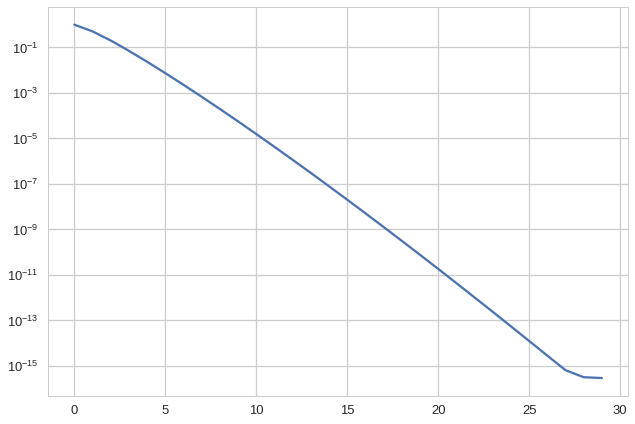

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
# plt.xkcd()
n = 1000
a = [[1.0/(i+j+1) for i in range(n)] for j in range(n)] #Hilbert matrix 
a = np.array(a)
u, s, v = np.linalg.svd(a)
fig, ax = plt.subplots(1, 1)
ax.semilogy(s[:30]/s[0])
#We have very good low-rank approximation of it!

Now we can do something more interesting, like function approximation

3.61306036286e-10


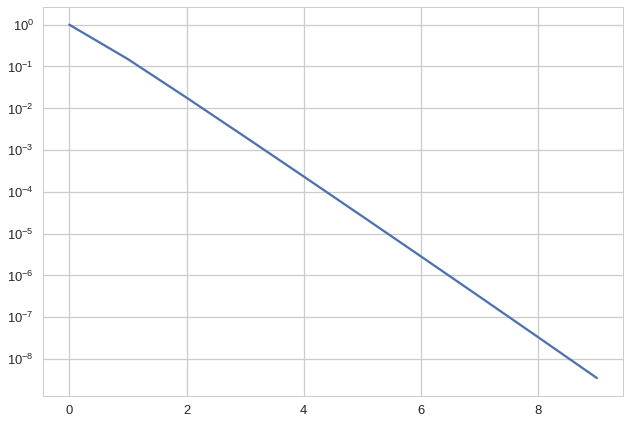

In [6]:
import numpy as np
n = 128
t = np.linspace(0, 5, n)
x, y = np.meshgrid(t, t)
f = 1.0 / (x + y + 0.5) # test your own function. Check 1.0 / (x - y + 0.5)
u, s, v = np.linalg.svd(f, full_matrices=False)
r = 10
u = u[:, :r]
s = s[:r]
v = v[:r, :] # Mind the transpose here!
fappr = u.dot(np.diag(s).dot(v))
er = np.linalg.norm(fappr - f, 'fro') / np.linalg.norm(f, 'fro')
print(er)
plt.semilogy(s/s[0])

And do some 3D plotting

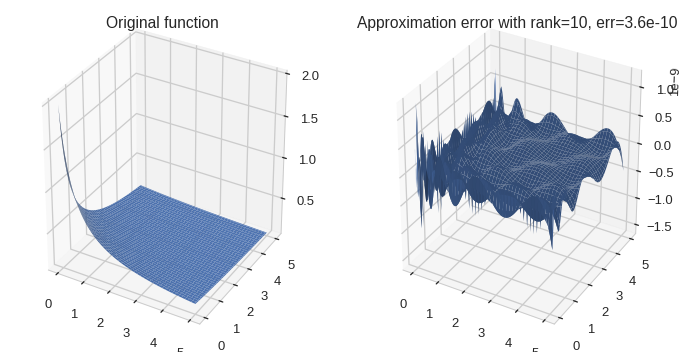

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plt.xkcd()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, f)
ax.set_title('Original function')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, fappr - f)
ax.set_title('Approximation error with rank=%d, err=%3.1e' % (r, er))
fig.subplots_adjust()
fig.tight_layout()

## Singular values of a random Gaussian matrix

What is the singular value decay of a random matrix?

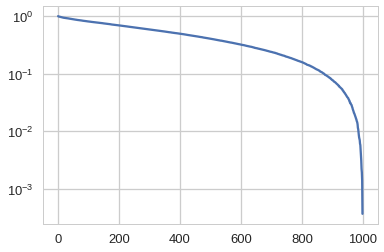

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# plt.xkcd()
n = 1000
a = np.random.randn(n, n)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])

## Linear factor analysis & low-rank
Consider a linear factor model, 

$$y = Ax, $$ where $y$ is a vector of length $n$, and $x$ is a vector of length $r$.  
The data is organized as samples: we observe vectors  
$$y_1, \ldots, y_T,$$
but do not know matrix $A$,
then the factor model can be written as  
$$
  Y = AX,
$$
where $Y$ is $n \times T$, $A$ is $n \times r$ and $X$ is $r \times T$. This is exactly a rank-$r$ model: it tells us that the vectors lie in a small subspace!  
We also can use SVD to recover this subspace (but not the independent components). Principal component analysis can be done by SVD!

## Applications of SVD

SVD is extremely important in computational science and engineering.

It has many names: Principal component analysis, Proper Orthogonal Decomposition, Empirical Orthogonal Functions

We will consider:

1. Latent semantic analysis
2. Collaborative filtering
3. Data compression

## Application 1: Latent semantic analysis
One of the most famous application is Latent semantic indexing, see, for example,  
[Deerwester, Scott C., et al. "Indexing by latent semantic analysis." (1990)](http://www.cob.unt.edu/itds/faculty/evangelopoulos/dsci5910/LSA_Deerwester1990.pdf)  

The problem setup: we have a set of text documents $D_1, \ldots, D_N.$ We want to solve the search problem: i.e., we have a query as a set of words, and we want to find the best documents.  
Our data is processed as follows:  for each document we create a list of words contained in the document, and count the frequencies of each word. This is called the **bag of words** model (i.e., the document is unordered set of words).  

## Term-document matrix
This is how the term-document matrix $A$ is obtained. Its row size is **the size of the dictionary**.   
Its column size is **the number of documents**.  An element $A_{ij}$ the frequency of occurence of the $i$-th word in the $j$-document.

To do the search, we can just multiply a term-documnt matrix by a **search vector**, i.e. a list of words.

**The problem**: The document will be returned only if there is an exact word match.  However, we might search for "Samuel Clemens", and hope to get the results for "Mark Twain" as well.  But there might be no exact match!  
How the SVD can help?

## Idea of LSI
Compute **low-rank approximation** $A_r$ of the term-document matrix $A$.  
$$A \approx A_r,$$
and **we do not care about the approximation error** (i.e., we do not require it to be small).  
The matrix $A_r$ can be then used to do queries.  

We project the documents to **low-dimensional subspace**, given a query $q$ the projection is  
$$q_r = \Sigma^{-1}_r U^{\top}_r q$$
Now we can compute the similarity between $d_r$ and other projected documents  
$$\widehat{d}_i = \Sigma^{-1}_r U^{\top}_r d_i,$$
and compute the **cosine** of the angles  between the query and the projected document.

## Demo
Now we can test a demo database

In [9]:
import numpy as np
import pandas as pd
import re #Regular expressions
rows = ['human', 'interface', 'computer', 'user', 'system', 'response', 'time', 'EPS', 'survey', 'trees', 'graph', 'minors']
nterms = len(rows)
docs = []
docs += ['Human machine interface for Lab ABC computer applications']
docs += ['A survey of user opinions of computer system response time']
docs += ['The EPS user interfaces management system']
docs += ['System and human system engineering testing of EPS']
docs += ['Relation of user-perceived response time on user management']
docs += ['The generation of random, binary, unordered trees']
docs += ['The intersection graph of paths in trees']
docs += ['Graph minors IV: Width of trees and well-quasi-ordering']
docs += ['Graph minors: A survey']
ndocs = len(docs)
term_doc = np.zeros((nterms, ndocs))
for i in range(nterms):
    for j in range(ndocs):
        if re.search(rows[i], docs[j], re.IGNORECASE):
            term_doc[i, j] = 1
#Use pandas to plot        
pd.DataFrame(data=term_doc,index=rows)

,0,1,2,3,4,5,6,7,8
human,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
interface,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
computer,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
system,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
response,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
time,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
EPS,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
survey,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
trees,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


Now we can compare the results between ordinary matvec and low-rank matvec.

In [10]:
query = 'Human computer interaction'
qv = np.zeros((nterms))
for i in range(nterms):
    if re.search(rows[i], query, re.IGNORECASE):
        qv[i] = 1
res1 = qv.dot(term_doc) #Non-compressed search result

u, s, v = np.linalg.svd(term_doc)
r = 2
u = u[:, :r]
s = s[:r]
v = v[:r, :] #Numpy transposes
appr1  = u.dot(np.diag(s)).dot(v)
res2 = qv.dot(appr1)
res_all = np.vstack((res1, res2)).T #To make two columns
print('There query is: {}, the scores are:'.format(query))
pd.DataFrame(res_all, index=docs, columns=['No SVD', 'SVD'])

There query is: Human computer interaction, the scores are:


,No SVD,SVD
Human machine interface for Lab ABC computer applications,2.0,0.316794
A survey of user opinions of computer system response time,1.0,1.011276
The EPS user interfaces management system,0.0,0.663677
System and human system engineering testing of EPS,1.0,0.405542
Relation of user-perceived response time on user management,0.0,0.554066
"The generation of random, binary, unordered trees",0.0,-0.035325
The intersection graph of paths in trees,0.0,-0.065210
Graph minors IV: Width of trees and well-quasi-ordering,0.0,-0.082587
Graph minors: A survey,0.0,0.055939


## Application 2: Collaborative filtering

Another important (and similar) application comes from **recommender systems**.  

Suppose you have a **user-product matrix**: each user puts a rating for a particular product.

The matrix is then **the number of users times the number of products**. The goal is to recommend additional products to be bought for a particular user.  

The scheme is the same: we compute the SVD, and the recommendation for each user is just a column of the approximated matrix.

In [ ]:
#Read the data
data_read = np.loadtxt('task2_transact_eval.txt',dtype=np.int32, skiprows=1,delimiter='|')

In [ ]:
columns = ['SessionNo', 'ItemNo', 'TransType']
ds = pd.DataFrame(data=data_read,columns=columns)

In [ ]:
from itertools import product
ds_buy = ds[ds.TransType==2][['SessionNo', 'ItemNo']]
users, inv_users = np.unique(data_read[:, 0], return_inverse=True)
products, inv_products = np.unique(data_read[:, 1], return_inverse=True)
print 'Unique sessions:', len(users), 'Unique products', len(products)
#Scipy spars

In [ ]:
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
%matplotlib inline
# plt.xkcd()
nnz = len(inv_users)
spmat = scipy.sparse.coo_matrix((np.ones(nnz), (inv_users, inv_products)))
r =  2 #Approximation rank
u, s, v = scipy.sparse.linalg.svds(spmat, r)
n = spmat.shape[0]
m = spmat.shape[1]
q = np.zeros(n)
user_id = 1
q[user_id] = 1.0

qrec = q.T.dot(u).dot(np.diag(s)).dot(v)
qrec = qrec / np.max(abs(qrec))
plt.plot(qrec)
qb = spmat.T.dot(q)
plt.plot(qb)
plt.xlabel('Product ID')
plt.ylabel('Recommendation')

## Application 3: Dense matrix compression

Dense matrices typically require $N^2$ elements to be stored. For $N \sim 10^4 - 10^5$ the memory requirements. A low rank approximation can reduces this number of $\mathcal{O}(Nr)$

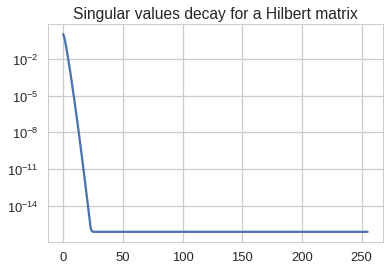

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.xkcd()
n = 256
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.semilogy(s/s[0])
plt.title('Singular values decay for a Hilbert matrix')

## A more realistic example
We can try to test on a more realistic matrix, since solving linear systems with Hilbert matrix has little practical sense. Instead, we solve a linear system with a matrix
$$A_{ij} = \frac{1}{i - j + \frac{1}{2}},$$
which corresponds to an integral equation
$$
    \int \frac{q(y)dy}{x - y } = f(x).
$$
In real life, the equation  

$$
    \int_{\Omega} \frac{q(y)dy}{\Vert x - y\Vert } = f(x),
$$

is solved, where $\Omega$ is a surface in 3D. This is used, for example, in modelling integral circuits.
Let us see what happens with the singular values.

3.9968028886505635e-15

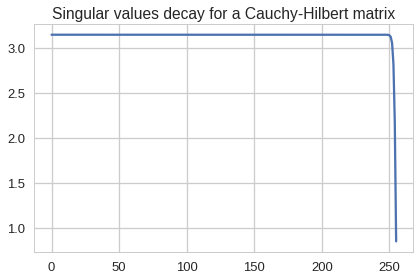

In [12]:
import numpy as np
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.xkcd()
n = 256
a = [[1.0/(i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
u, s, v = np.linalg.svd(a)
plt.plot(s)
plt.title('Singular values decay for a Cauchy-Hilbert matrix')
plt.tight_layout()
s[5] - np.pi

What to do?  

The idea is to break the matrix intro blocks  

$$
    A = \begin{bmatrix}
    A_{11} & A_{12} \\
    A_{21} & A_{22}
    \end{bmatrix}
$$

and the blocks $A_{12}$ and $A_{21}$ will be of low-rank!  Let us try that..

## Block-low rank matrices

Surprisingly many matrices in PDEs can be well approximated by block-low-rank (other names: hierarchical, mosaic-skeleton) matrices.

They have linear storage, but algorithms are not very **simple**

## Take home message
- Matrix rank definition
- Skeleton approximation and dyadic representation of a rank-$r$ matrix
- Singular value decomposition and Eckart-Young theorem
- Three applications of SVD

## Next lecture
- Linear systems
- Inverse matrix
- Condition number
- Linear least squares
- Pseudoinverse

## Next lecture
- Think of course projects

##### Questions?

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()